In [1]:
import cv2
import matplotlib.pyplot as plt

In [7]:
def show(name, n, m, i, Title):
    plt.subplot(n, m, i)
    plt.imshow(name, cmap='gray')
    plt.title(Title)
    plt.axis('off')

In [8]:
def low_pass_filter(image, kernel_size=15, sigma=2):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)


In [9]:
def high_pass_filter(image, kernel_size=15, sigma=2):
    low_passed = low_pass_filter(image, kernel_size, sigma)
    high_passed = image - low_passed
    return high_passed

In [14]:
def combined(image1, image2):
    return cv2.addWeighted(image1, 0.5, image2, 0.5, 0)

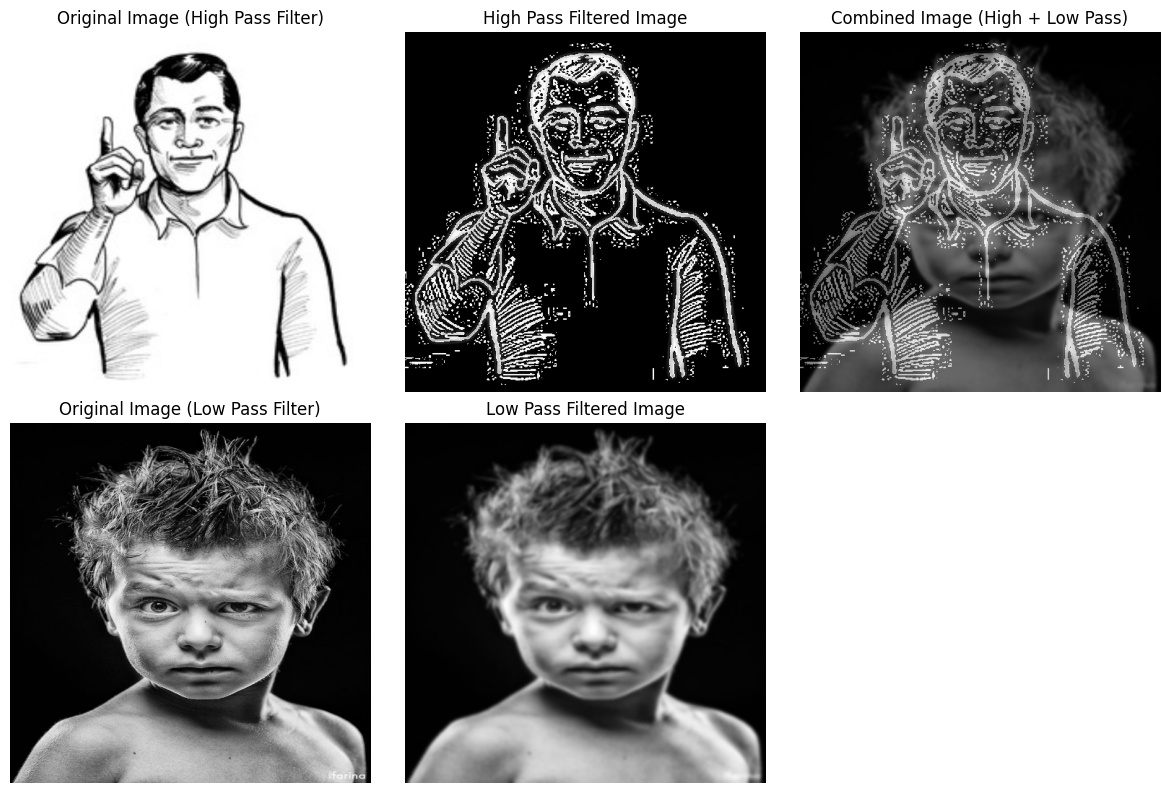

In [38]:
def main():
    image1 = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
    resized_image_1 = cv2.resize(image1, (500, 500))
    image2 = cv2.imread('A Collection of Powerful Black and White Images.jpeg', cv2.IMREAD_GRAYSCALE)
    resized_image_2 = cv2.resize(image2, (500, 500))

    high_passed_image = high_pass_filter(resized_image_1)
    low_passed_image = low_pass_filter(resized_image_2)
    combined_image = combined(high_passed_image, low_passed_image)


    plt.figure(figsize=(12, 8))

    # Show the images in a 2x3 grid
    show(resized_image_1, 2, 3, 1, "Original Image (High Pass Filter)")
    show(high_passed_image, 2, 3, 2, "High Pass Filtered Image")
    show(resized_image_2, 2, 3, 4, "Original Image (Low Pass Filter)")
    show(low_passed_image, 2, 3, 5, "Low Pass Filtered Image")
    show(combined_image, 2, 3, 3, "Combined Image (High + Low Pass)")
    plt.tight_layout()
    plt.show()

# Call the main function to execute the code
if __name__ == "__main__":
    main()